# Lidando com os dados

Realizando as importações

In [775]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

Criando os dataframes iniciais

In [776]:
treino = pd.read_csv('data/train.csv')
final = pd.read_csv('data/test.csv')

Visualização Inicial dos dataframes

In [777]:
def ver_colunas(dataset):
    colunas = dataset.columns
    view_colunas = ''
    for coluna in colunas:
        view_colunas += f'  -  {coluna}'
    print(view_colunas)

ver_colunas(treino)

  -  Id  -  Elevation  -  Aspect  -  Slope  -  Horizontal_Distance_To_Hydrology  -  Vertical_Distance_To_Hydrology  -  Horizontal_Distance_To_Roadways  -  Hillshade_9am  -  Hillshade_Noon  -  Hillshade_3pm  -  Horizontal_Distance_To_Fire_Points  -  Wilderness_Area1  -  Wilderness_Area2  -  Wilderness_Area3  -  Wilderness_Area4  -  Soil_Type1  -  Soil_Type2  -  Soil_Type3  -  Soil_Type4  -  Soil_Type5  -  Soil_Type6  -  Soil_Type7  -  Soil_Type8  -  Soil_Type9  -  Soil_Type10  -  Soil_Type11  -  Soil_Type12  -  Soil_Type13  -  Soil_Type14  -  Soil_Type15  -  Soil_Type16  -  Soil_Type17  -  Soil_Type18  -  Soil_Type19  -  Soil_Type20  -  Soil_Type21  -  Soil_Type22  -  Soil_Type23  -  Soil_Type24  -  Soil_Type25  -  Soil_Type26  -  Soil_Type27  -  Soil_Type28  -  Soil_Type29  -  Soil_Type30  -  Soil_Type31  -  Soil_Type32  -  Soil_Type33  -  Soil_Type34  -  Soil_Type35  -  Soil_Type36  -  Soil_Type37  -  Soil_Type38  -  Soil_Type39  -  Soil_Type40  -  Cover_Type


Traduzindo as colunas

In [778]:
#Não há necessidade de traduzir os Soil_TypeX ou os Wilderness_AreaX

dict_traducao = {'Elevation': 'Elevação','Aspect':'Azimute','Slope':'Declive', 'Horizontal_Distance_To_Hydrology':'H_Dist_Hidrologia',
'Vertical_Distance_To_Hydrology':'V_Dist_Hidrologia','Horizontal_Distance_To_Roadways':'H_Dist_Estradas',
'Hillshade_9am':'Sombra_09h','Hillshade_Noon':'Sombra_12h','Hillshade_3pm':'Sombra_15h',
'Horizontal_Distance_To_Fire_Points':'H_Dist_Foco_Incêndio','Cover_Type':'Tipo_Vegetação'}

treino.rename(columns=dict_traducao, inplace = True)
final.rename(columns=dict_traducao, inplace = True)

ver_colunas(treino)

### Tratando os Dados

In [780]:
#Verificando dados nulos
treino.isnull().values.any() and final.isnull().values.any()
#Não existem dados nulos

False

In [783]:
#Verificando as colunas constantes
constantes = []
for coluna in treino.columns:
    if len(treino[coluna].value_counts()) == 1:
        constantes.append(coluna)
print(constantes)

#Os solos 7 e 15 são constantes, portanto serão eliminados dos dataframes

treino.drop('Soil_Type7',axis=1,inplace=True)
treino.drop('Soil_Type15',axis=1,inplace=True)

final.drop('Soil_Type7',axis=1,inplace=True)
final.drop('Soil_Type15',axis=1,inplace=True)


In [784]:
#Criando uma coluna única para o solo e para a região selvagem

conjunto = [treino,final]
for dataframe in conjunto:
    lista_solos = [f'Soil_Type{i}' for i in range(1,41) if i not in [7,15]]
    solos=dataframe[lista_solos]
    regiao=dataframe[['Wilderness_Area1','Wilderness_Area2','Wilderness_Area3','Wilderness_Area4']]

    s= pd.DataFrame([x for x in np.where(solos ==1, solos.columns,'').flatten().tolist() if len(x) >0],columns= (['Solos']))
    r= pd.DataFrame([x for x in np.where(regiao ==1, regiao.columns,'').flatten().tolist() if len(x) >0],columns= (['Região']))

    dict = {f'Soil_Type{i}':i for i in range(1,41) if i not in [7,15]}
    dict1 = {f'Wilderness_Area{i}':i for i in range(1,5)}

    dataframe['Solos']=s['Solos'].map(dict)
    dataframe['Região']=r['Região'].map(dict1)
    dataframe['Solos'].fillna(0,inplace=True)

In [785]:
#Verificando viés nos dados
print(treino.skew().where(treino.skew() < -1.2).dropna())
print(treino.skew().where(treino.skew() > 1.2).dropna())

#Com isso, podemos perceber que as colunas de Solo e Área possuem um alto viés. Apesar disso, não as alteraremos.
#Porém as colunas V_Dist_Hidrologia e H_Dist_Foco_Incêndio serão alteradas reduzindo sua escala.
normalizar = ['V_Dist_Hidrologia','H_Dist_Foco_Incêndio','H_Dist_Hidrologia','H_Dist_Estradas']

def escalando(dataframe):
    lista = []
    for i in dataframe['V_Dist_Hidrologia']:
        if i < 0:
            lista.append(math.sqrt(abs(i))*-1)
        else: lista.append(math.sqrt(abs(i)))
    dataframe['sqrt_V_Dist_Hidrologia'] = lista

    lista = []
    for i in dataframe['H_Dist_Foco_Incêndio']:
        if i < 0:
            lista.append(math.sqrt(abs(i))*-1)
        else: lista.append(math.sqrt(abs(i)))
    dataframe['sqrt_H_Dist_Foco_Incêndio'] = lista

    lista = []
    for i in dataframe['H_Dist_Hidrologia']:
        if i < 0:
            lista.append(math.sqrt(abs(i))*-1)
        else: lista.append(math.sqrt(abs(i)))
    dataframe['sqrt_H_Dist_Hidrologia'] = lista

    lista = []
    for i in dataframe['H_Dist_Estradas']:
        if i < 0:
            lista.append(math.sqrt(abs(i))*-1)
        else: lista.append(math.sqrt(abs(i)))
    dataframe['sqrt_H_Dist_Estradas'] = lista

escalando(treino)
escalando(final)

Series([], dtype: float64)
H_Dist_Hidrologia         1.488052
V_Dist_Hidrologia         1.537776
H_Dist_Estradas           1.247811
H_Dist_Foco_Incêndio      1.617099
Wilderness_Area1          1.231244
Wilderness_Area2          5.228781
Soil_Type1                6.294716
Soil_Type2                4.617019
Soil_Type3                3.575995
Soil_Type4                3.872721
Soil_Type5                9.416209
Soil_Type6                4.506716
Soil_Type8              122.963409
Soil_Type9               38.849712
Soil_Type10               2.055410
Soil_Type11               5.854551
Soil_Type12               7.977205
Soil_Type13               5.366836
Soil_Type14               9.300318
Soil_Type16              11.387050
Soil_Type17               4.663945
Soil_Type18              15.781426
Soil_Type19              18.048915
Soil_Type20              10.286265
Soil_Type21              30.695081
Soil_Type22               6.391991
Soil_Type23               4.126701
Soil_Type24               7.

In [786]:
#Visualização do dataframe
treino.head()

,Id,Elevação,Azimute,Declive,H_Dist_Hidrologia,V_Dist_Hidrologia,H_Dist_Estradas,Sombra_09h,Sombra_12h,Sombra_15h,...,Soil_Type38,Soil_Type39,Soil_Type40,Tipo_Vegetação,Solos,Região,sqrt_V_Dist_Hidrologia,sqrt_H_Dist_Foco_Incêndio,sqrt_H_Dist_Hidrologia,sqrt_H_Dist_Estradas
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,5,29,1,0.000000,79.240141,16.062378,22.583180
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,5,29,1,-2.449490,78.898669,14.560220,19.748418
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,2,12,1,8.062258,78.236820,16.370706,56.391489
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,2,30,1,10.862780,78.809898,15.556349,55.587768
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,5,29,1,-1.000000,78.562077,12.369317,19.773720


### Visualizando os dados


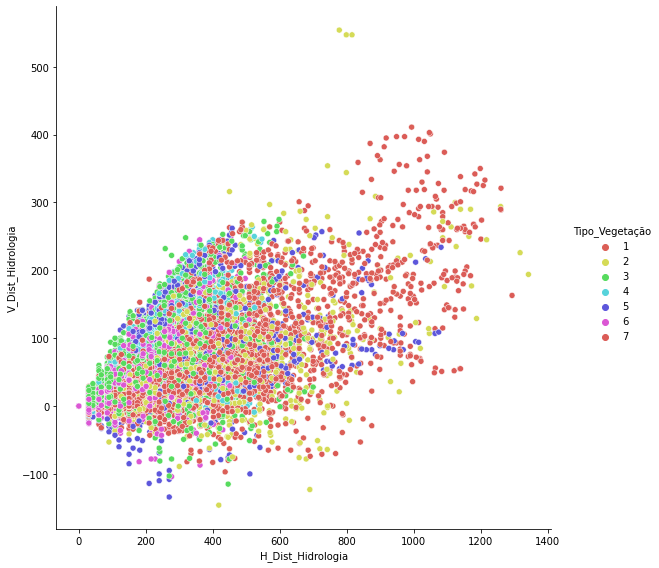

In [787]:
#Esse gráfico mostra os tipos de vegetação baseado na distância da água
#Assim, podemos perceber que quanto mais distante da água menor a variedade das vegetações

grafico = sns.pairplot(data = treino, hue='Tipo_Vegetação', height= 8, palette="hls",
x_vars='H_Dist_Hidrologia', y_vars='V_Dist_Hidrologia')

C:\Users\lucas\AppData\Local\Temp\ipykernel_11820\2072793331.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


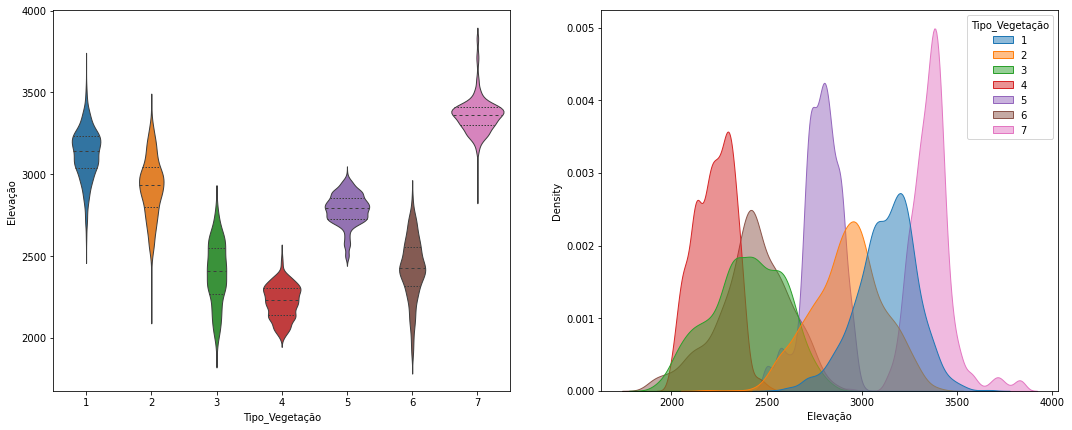

In [788]:
#Esse gráfico mostra os tipos de vegetação baseado na elevação
#Assim, podemos perceber que os tipos diferentes de vegetação possuem diferentes distrubuições ideais de altitude

plt.rcParams["figure.figsize"]=18,7
fig, ax = plt.subplots(1, 2)
sns.violinplot(data = treino ,x='Tipo_Vegetação', y='Elevação', inner="quart",split=True, linewidth=1, ax=ax[0])
sns.kdeplot(data=treino, x="Elevação", hue="Tipo_Vegetação", fill=True, common_norm=False, alpha=0.5, palette="tab10", ax=ax[1])
fig.show()

<AxesSubplot:>

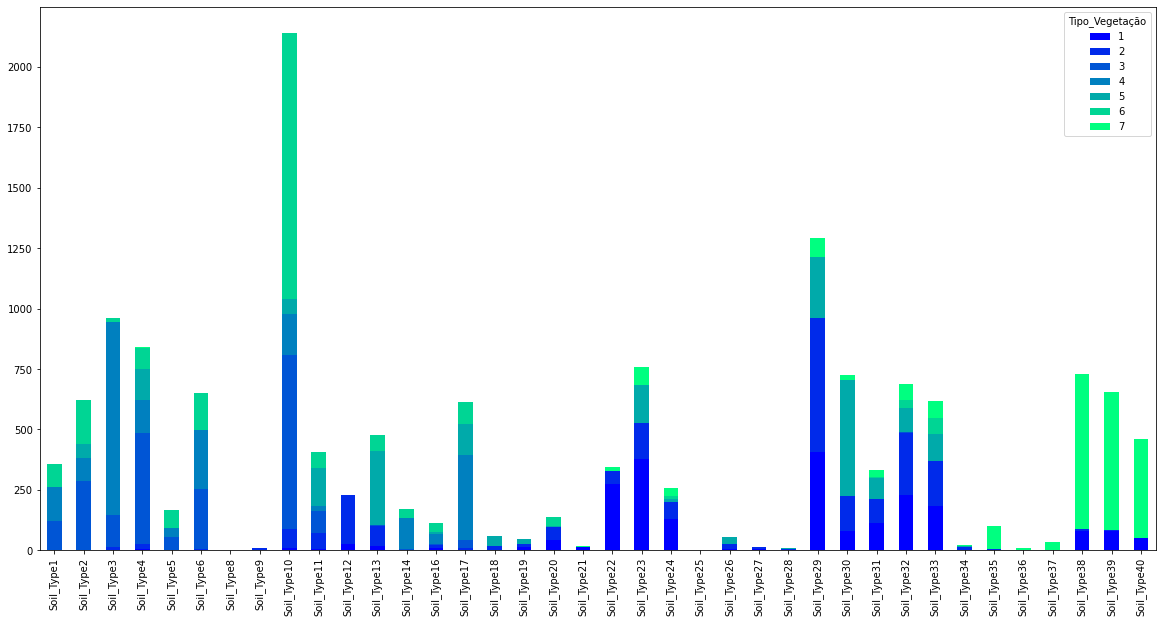

In [789]:
#Esse gráfico mostra a quantidade dos tipos de vegetação pelo solo
#Assim, podemos perceber que os tipos diferentes de vegetação possuem diferentes solos ideais

solos = treino[lista_solos + ['Tipo_Vegetação']].groupby('Tipo_Vegetação').sum()
plt.rcParams["figure.figsize"]=20,10
solos.T.plot(kind='bar',stacked=True,colormap='winter')


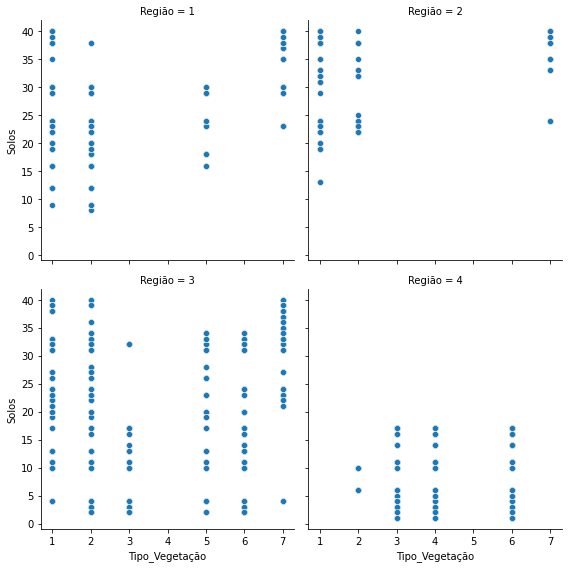

In [790]:
#Esse gráfico mostra a quantidade dos tipos de vegetação pelo solo
#Assim, podemos perceber que a terceira regiao analisada é aquela que apresnta maior biodiversidade.

srv = pd.DataFrame()
srv = treino[['Solos','Região','Tipo_Vegetação']]


grafico5 = sns.FacetGrid(srv, col='Região', height=4,col_wrap=2)
grafico5.map(sns.scatterplot,'Tipo_Vegetação','Solos')

<AxesSubplot:>

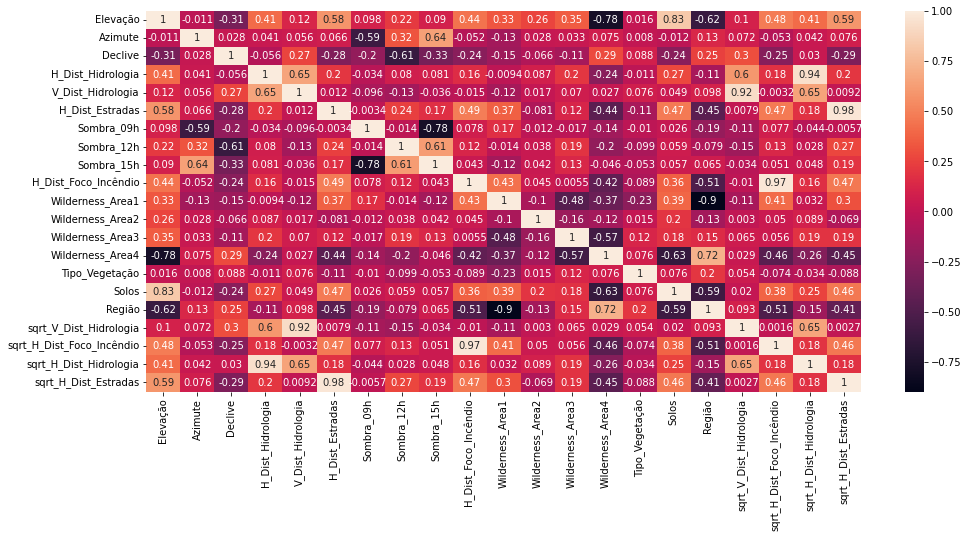

In [791]:
#Esse gráfico mostra a correlação entre as colunas do dataframe 
#Assim, podemos perceber que a região que é mais proxima dos focos de incendio é a 4, enquanto a mais distante é a 1.

df=treino.drop( columns =['Id']+lista_solos)
corr=df.corr()

teste = corr[corr['Tipo_Vegetação'] >= 0.1]

plt.rcParams['figure.figsize']=16,7
sns.heatmap(corr , annot= True)


<AxesSubplot:>

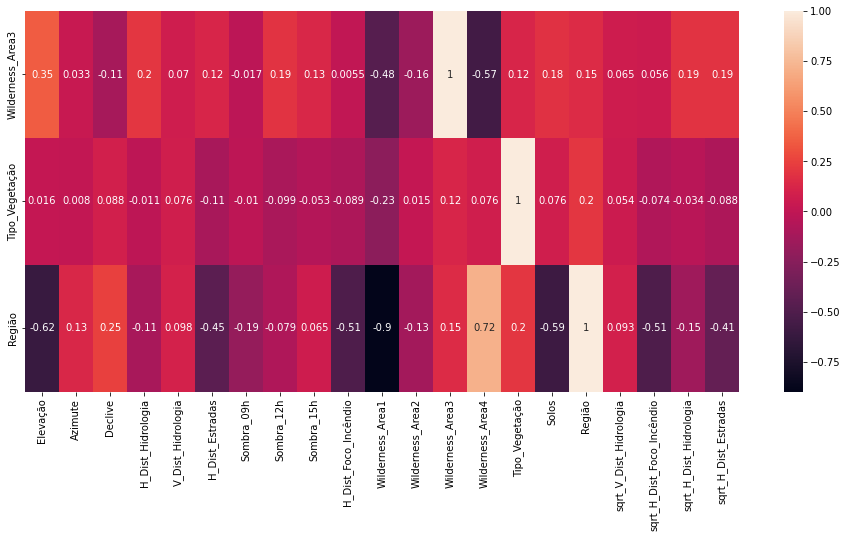

In [792]:
#Verificando apenas a correlação das colunas com 0.1 ou mais de correlation com a coluna alvo 'Tipo_Vegetação'

teste = corr[corr['Tipo_Vegetação'] >= 0.1]

plt.rcParams['figure.figsize']=16,7
sns.heatmap(teste , annot= True)

# Criando o modelo

Realizando as importações

In [793]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [794]:
#Definindo as matrizes X e Y

y = treino.Tipo_Vegetação
x = treino.drop(['Tipo_Vegetação','Id' ],axis=1)

#Criando os sets de treino e teste
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [795]:
#Treinando os modelos

clf_RFC = RandomForestClassifier(n_estimators=200)
clf_RFC.fit(x_train,y_train)

clf_SGD = SGDClassifier()
clf_SGD.fit(x_train,y_train)

Log_R = LogisticRegression()
Log_R.fit(x_train,y_train)

clf_Knei =KNeighborsClassifier()
clf_Knei.fit(x_train,y_train)

Gaus_NB = GaussianNB()
Gaus_NB.fit(x_train,y_train)

Percpt =Perceptron()
Percpt.fit(x_train,y_train)

extratree =ExtraTreesClassifier(n_estimators=120, max_features=None, min_samples_leaf=1, min_samples_split=2, random_state=42)
extratree.fit(x_train,y_train)

C:\Users\lucas\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ExtraTreesClassifier(max_features=None, n_estimators=120, random_state=42)

In [796]:
#Validando os modelos
#Consistentemente os valroes do ExtraTrees são os melhores, com a única exceção de ser ultrapassado pelo RnadomForest em algumas circunstâncias
y_pred0 = clf_RFC.predict(x_test)
print(f'Acurácia RFC = {round(accuracy_score(y_pred0,y_test)*100,2)}%')

y_pred1 = clf_SGD.predict(x_test)
print(f'Acurácia SGD = {round(accuracy_score(y_pred1,y_test)*100,2)}%')

y_pred2 = Log_R.predict(x_test)
print(f'Acurácia LOG_R = {round(accuracy_score(y_pred2,y_test)*100,2)}%')

y_pred3 = clf_Knei.predict(x_test)
print(f'Acurácia Knei = {round(accuracy_score(y_pred3,y_test)*100,2)}%')

y_pred4 = Gaus_NB.predict(x_test)
print(f'Acurácia Gaus = {round(accuracy_score(y_pred4,y_test)*100,2)}%')

y_pred5 = Percpt.predict(x_test)
print(f'Acurácia Percep = {round(accuracy_score(y_pred5,y_test)*100,2)}%')

y_pred6 = extratree.predict(x_test)
print(f'Acurácia ETC = {round(accuracy_score(y_pred6,y_test)*100,2)}%')



Acurácia RFC = 87.33%
Acurácia SGD = 41.53%
Acurácia LOG_R = 46.69%
Acurácia Knei = 80.09%
Acurácia Gaus = 59.13%
Acurácia Percep = 32.71%
Acurácia ETC = 88.16%


In [797]:
#Realizando a previsões com o dataframe final
x = final.drop(['Id'],axis=1)

#Exportando um dataframe para cada um dos modelos
lista_modelos = [clf_RFC,clf_SGD,Log_R,clf_Knei,Gaus_NB,Percpt,extratree]

def exporta_modelos(modelo):
    
    y = modelo.predict(x)
    submission = pd.DataFrame()
    submission['Id'] = final['Id']
    submission['Cover_Type'] = y
    submission['Cover_Type'].astype(int)
    submission.set_index('Id', inplace = True)

    submission.to_csv(f'submissions/submission_{modelo}.csv')

for i in lista_modelos:
    exporta_modelos(i)
